In [1]:
import warnings
warnings.filterwarnings('ignore');

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step:1 Reading and understanding the data

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step2: Removing and modifing the required columns

In [7]:
# Extracting month and year from the dataset
df['dteday'] = pd.to_datetime(df['dteday'])

In [8]:
# Extracting month and year from 'dteday'
df['month'] = pd.DatetimeIndex(df['dteday']).month
df['year'] = pd.DatetimeIndex(df['dteday']).year

In [9]:
# dropping yr and month as we have extracted them  from datetime
df.drop(df[['yr','mnth']],axis = 1,inplace=True)

In [10]:
#dropping holiday as we have working day
df.drop('holiday',axis= 1,inplace=True)

In [11]:
#As we have extracted month and year from 'dteday' we can drop them.
df.drop('dteday',axis = 1,inplace = True)

In [12]:
#dropping un-necessary columns
df.drop(['instant','casual','registered'],axis=1,inplace =True)

In [13]:
df

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,year
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,2018
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2,2018
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,2018
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,2018
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,2018
...,...,...,...,...,...,...,...,...,...,...,...
725,1,5,1,2,10.420847,11.33210,65.2917,23.458911,2114,12,2019
726,1,6,0,2,10.386653,12.75230,59.0000,10.416557,3095,12,2019
727,1,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,12,2019
728,1,1,1,1,10.489153,11.58500,48.3333,23.500518,1796,12,2019


In [14]:
df['year'].unique()

array([2018, 2019], dtype=int64)

In [15]:
# converting the required numeric variables to categorical variables

df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df['weekday'] = df['weekday'].map({0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'})
df['workingday'] = df['workingday'].map({1:'workingday',0:'holiday'})
df['weathersit'] = df['weathersit'].map({1:'clear',2:'mist',3:'snow'})
df['month'] = df['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df['year'] = df['year'].map({2019:1,2018:0})

In [16]:
df

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,year
0,spring,tue,workingday,mist,14.110847,18.18125,80.5833,10.749882,985,jan,0
1,spring,wed,workingday,mist,14.902598,17.68695,69.6087,16.652113,801,feb,0
2,spring,thu,workingday,clear,8.050924,9.47025,43.7273,16.636703,1349,mar,0
3,spring,fri,workingday,clear,8.200000,10.60610,59.0435,10.739832,1562,apr,0
4,spring,sat,workingday,clear,9.305237,11.46350,43.6957,12.522300,1600,may,0
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,sat,workingday,mist,10.420847,11.33210,65.2917,23.458911,2114,dec,1
726,spring,sun,holiday,mist,10.386653,12.75230,59.0000,10.416557,3095,dec,1
727,spring,mon,holiday,mist,10.386653,12.12000,75.2917,8.333661,1341,dec,1
728,spring,tue,workingday,clear,10.489153,11.58500,48.3333,23.500518,1796,dec,1


### visulising numeric variables

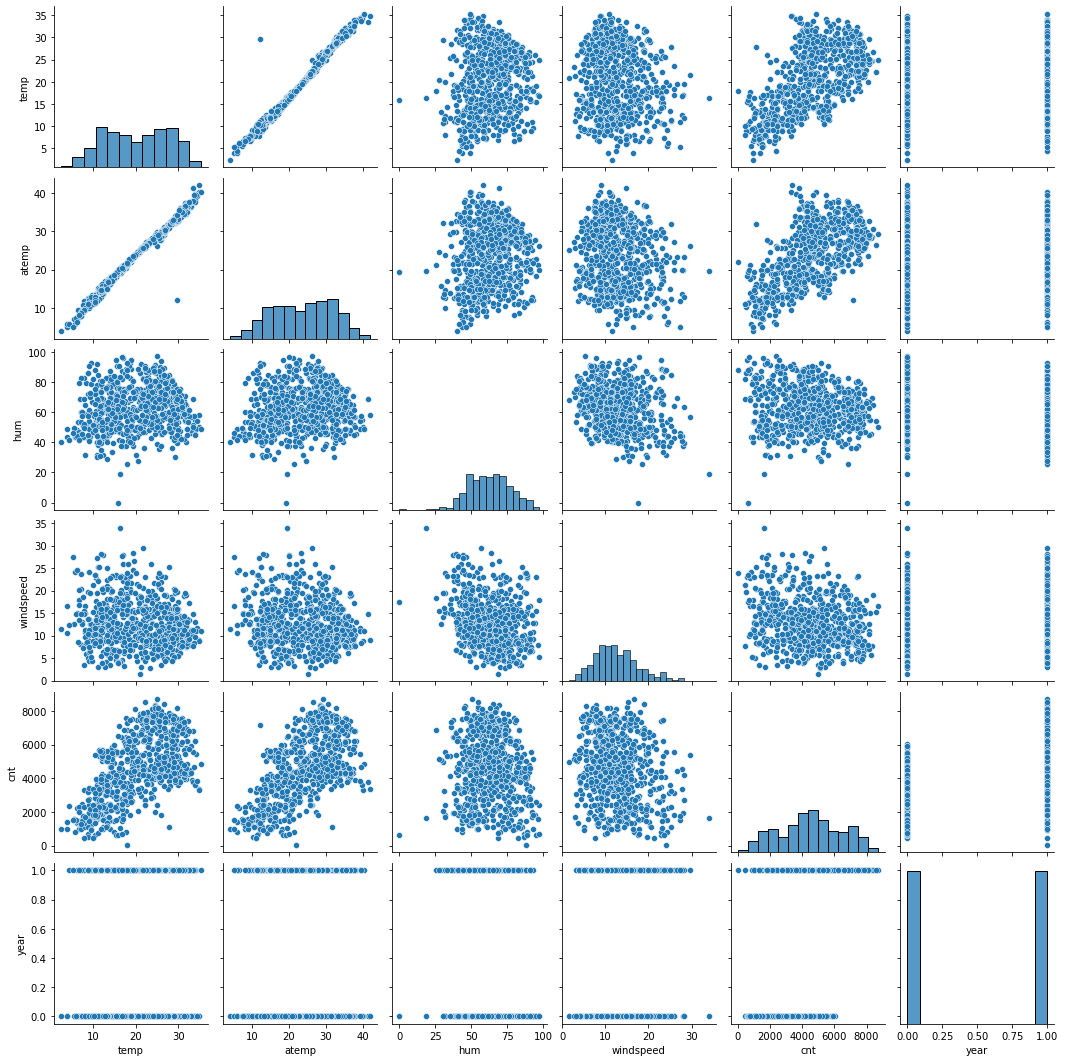

In [17]:
#visulising numeric variables
sns.pairplot(df)

In [18]:
# By the above correlation we can say that:
#Given bike dataset is more correlated to 'temp'
#there is some positive correlation in 'cnt'

<AxesSubplot:>

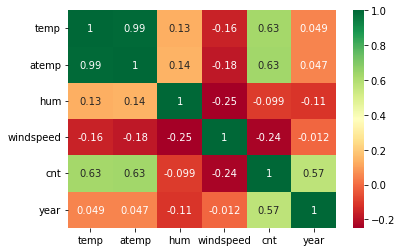

In [19]:
#checking the correlation of the variables
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [20]:
#'temp' and a'atemp' are highly  correlated o dropping the atemp
df.drop('atemp',axis = 1,inplace = True)

### Visualising Categorical variables

In [21]:
df

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,month,year
0,spring,tue,workingday,mist,14.110847,80.5833,10.749882,985,jan,0
1,spring,wed,workingday,mist,14.902598,69.6087,16.652113,801,feb,0
2,spring,thu,workingday,clear,8.050924,43.7273,16.636703,1349,mar,0
3,spring,fri,workingday,clear,8.200000,59.0435,10.739832,1562,apr,0
4,spring,sat,workingday,clear,9.305237,43.6957,12.522300,1600,may,0
...,...,...,...,...,...,...,...,...,...,...
725,spring,sat,workingday,mist,10.420847,65.2917,23.458911,2114,dec,1
726,spring,sun,holiday,mist,10.386653,59.0000,10.416557,3095,dec,1
727,spring,mon,holiday,mist,10.386653,75.2917,8.333661,1341,dec,1
728,spring,tue,workingday,clear,10.489153,48.3333,23.500518,1796,dec,1


<AxesSubplot:xlabel='year', ylabel='cnt'>

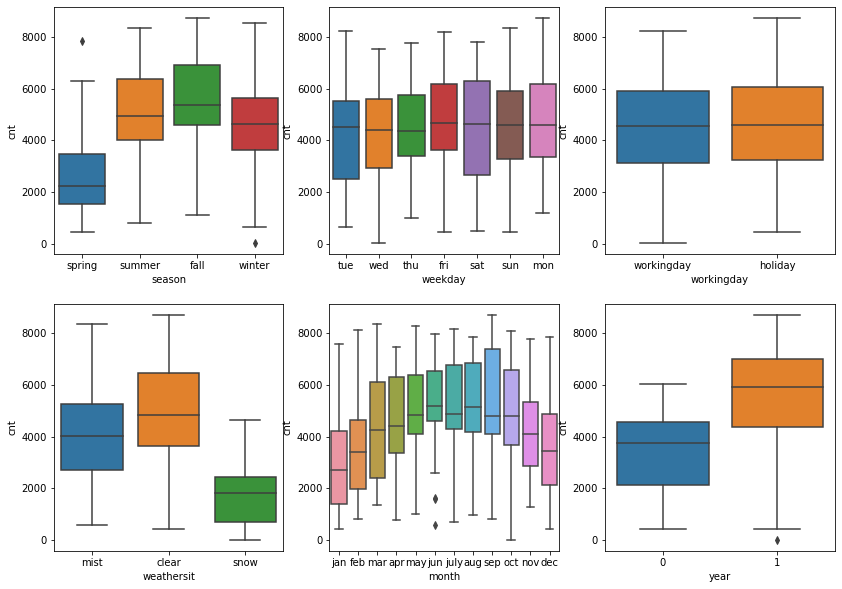

In [22]:
#visualsing the categorical variables

plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
sns.boxplot(x='season' , y='cnt' , data=df)
plt.subplot(2,3,2)
sns.boxplot(x='weekday' , y='cnt' , data=df)
plt.subplot(2,3,3)
sns.boxplot(x='workingday' , y='cnt' , data=df)
plt.subplot(2,3,4)
sns.boxplot(x='weathersit' , y='cnt' , data=df)
plt.subplot(2,3,5)
sns.boxplot(x='month' , y='cnt' , data=df)
plt.subplot(2,3,6)
sns.boxplot(x='year' , y='cnt' , data=df)

In [23]:
#BoomBikes rentals are more in Season Fall
#BoomBikes rentals are more in saturday 
#BoomBikes rentals are more in Weathersit clear
#BoomBikes rentals are more in month sep
#BoomBikes rentals are more in year 2019

In [24]:
#creating the dummy variables

seasons = pd.get_dummies(df['season'],drop_first=True)
weekdays = pd.get_dummies(df['weekday'],drop_first=True)
working_day = pd.get_dummies(df['workingday'],drop_first=True)
weather = pd.get_dummies(df['weathersit'],drop_first=True)
months = pd.get_dummies(df['month'],drop_first=True)

In [25]:
#concating the dummy variables with dataset

df = pd.concat([df,seasons,weekdays,working_day,weather,months],axis=1)
df.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,month,year,...,dec,feb,jan,july,jun,mar,may,nov,oct,sep
0,spring,tue,workingday,mist,14.110847,80.5833,10.749882,985,jan,0,...,0,0,1,0,0,0,0,0,0,0
1,spring,wed,workingday,mist,14.902598,69.6087,16.652113,801,feb,0,...,0,1,0,0,0,0,0,0,0,0
2,spring,thu,workingday,clear,8.050924,43.7273,16.636703,1349,mar,0,...,0,0,0,0,0,1,0,0,0,0
3,spring,fri,workingday,clear,8.200000,59.0435,10.739832,1562,apr,0,...,0,0,0,0,0,0,0,0,0,0
4,spring,sat,workingday,clear,9.305237,43.6957,12.522300,1600,may,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
#dropping the categorical variables as dummy variables are created

df.drop(['season','weekday','workingday','weathersit','month'],axis=1,inplace = True)

In [27]:
df.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,mon,sat,...,dec,feb,jan,july,jun,mar,may,nov,oct,sep
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Step3:Splitting the data into test train split

In [28]:
# splitting into train_test_split

df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 27)
(219, 27)


### Rescaling of the variables
  - Rescaling is used because of the scales of all variables are different
  - There are two types of scaling 'min-max(normalisation)' or 'standardisation'
  - Here we use min-max because it treat outliers

In [29]:
# 1. Instantiate  a object
scaler = MinMaxScaler()

#create a list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,mon,sat,...,dec,feb,jan,july,jun,mar,may,nov,oct,sep
653,0.509887,0.575354,0.300794,0.864243,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
576,0.815169,0.725633,0.264686,0.827658,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0.442393,0.640189,0.255342,0.465255,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
728,0.245101,0.498067,0.663106,0.204096,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


## Step4: training the model

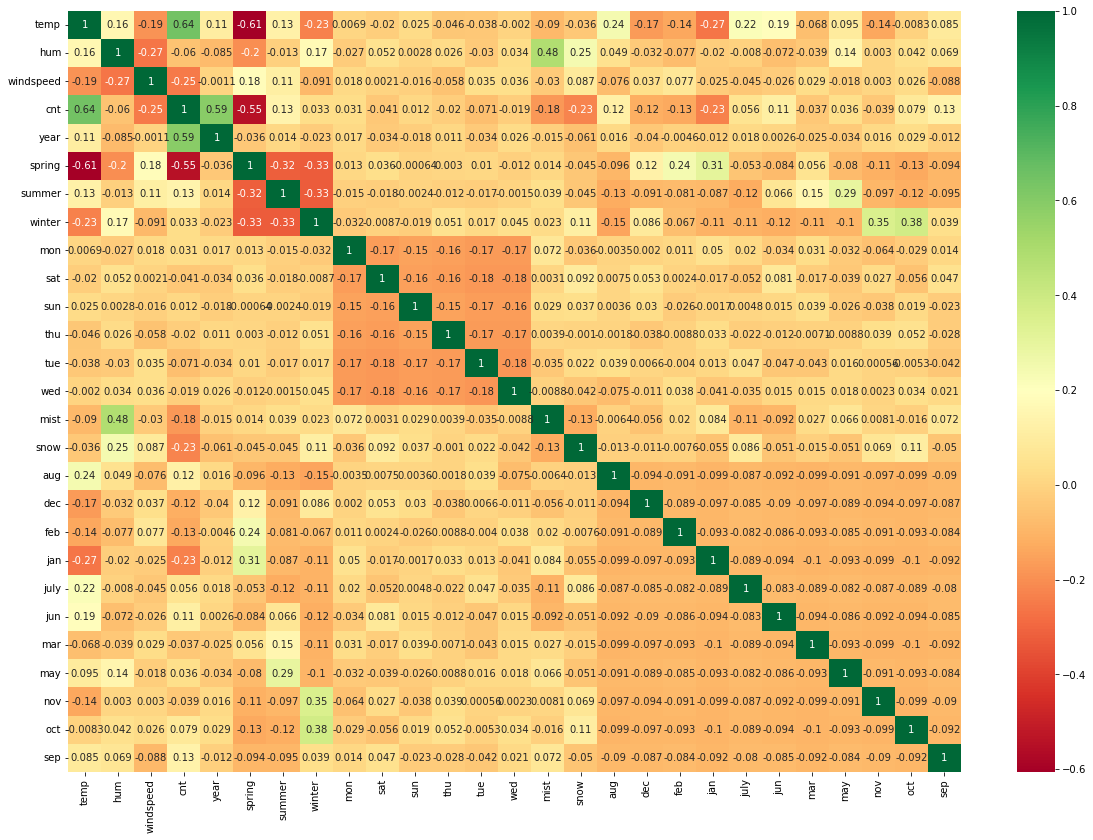

In [31]:
plt.figure(figsize = (20,14))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

### splitting into x and  y for model

In [32]:
# x_train  , y_train

y_train = df_train.pop('cnt')
x_train = df_train

In [33]:
x_train.head()

,temp,hum,windspeed,year,spring,summer,winter,mon,sat,sun,...,dec,feb,jan,july,jun,mar,may,nov,oct,sep
653,0.509887,0.575354,0.300794,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
576,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0.442393,0.640189,0.255342,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,0.245101,0.498067,0.663106,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Using RFE aproach for feature selection
# We start with 10

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)            
rfe = rfe.fit(x_train, y_train)

In [35]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 17),
 ('sat', False, 15),
 ('sun', False, 16),
 ('thu', False, 7),
 ('tue', False, 6),
 ('wed', False, 3),
 ('mist', True, 1),
 ('snow', True, 1),
 ('aug', False, 11),
 ('dec', False, 8),
 ('feb', False, 10),
 ('jan', False, 4),
 ('july', False, 2),
 ('jun', False, 9),
 ('mar', False, 13),
 ('may', False, 12),
 ('nov', False, 5),
 ('oct', False, 14),
 ('sep', True, 1)]

In [39]:
col = x_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'year', 'spring', 'summer', 'winter',
       'mist', 'snow', 'sep'],
      dtype='object')

In [40]:
x_train.columns[~rfe.support_]

Index(['mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb', 'jan',
       'july', 'jun', 'mar', 'may', 'nov', 'oct'],
      dtype='object')

In [38]:
## with the rfe feature selection we are able to eliminate the above columns

In [41]:
x_train_rfe = x_train[col]

In [42]:
x_train_rfe

,temp,hum,windspeed,year,spring,summer,winter,mist,snow,sep
653,0.509887,0.575354,0.300794,1,0,0,1,0,0,0
576,0.815169,0.725633,0.264686,1,0,0,0,0,0,0
426,0.442393,0.640189,0.255342,1,1,0,0,1,0,0
728,0.245101,0.498067,0.663106,1,1,0,0,0,0,0
482,0.395666,0.504508,0.188475,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
526,0.824514,0.605840,0.355596,1,0,1,0,1,0,0
578,0.863973,0.679690,0.187140,1,0,0,0,0,0,0
53,0.202618,0.435939,0.111379,0,1,0,0,0,0,0
350,0.248216,0.577930,0.431816,0,0,0,1,1,0,0


In [43]:
#add Constant
x_train_rfe1 = sm.add_constant(x_train_rfe)

# create a first model
lr = sm.OLS(y_train, x_train_rfe1)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const        0.278259
temp         0.502693
hum         -0.143680
windspeed   -0.180621
year         0.231508
spring      -0.066335
summer       0.051588
winter       0.091604
mist        -0.054432
snow        -0.231175
sep          0.068589
dtype: float64

In [44]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          9.95e-185
Time:                        20:38:19   Log-Likelihood:                 490.13
No. Observations:                 510   AIC:                            -958.3
Df Residuals:                     499   BIC:                            -911.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2783      0.035      7.862      0.000       0.209       0.348
temp           0.5027      0.034     14.623      0.000       0.435       0.570
hum           -0.1437      0.039     -3.696      0.000      -0.220      -0.067
windspeed     -0.1806      0.027     -6.766      0.000      -0.233      -0.128
year           0.2315      0.008     27.494      0.000       0.215       0.248
spring        -0.0663      0.021     -3.204      0.001      -0.107      -0.026
summer         0.0516      0.014      3.695      0.000       0.024       0.079
winter         0.0916      0.017      5.419      0.000       0.058       0.125
mist          -0.0544      0.011     -4.992      0.000      -0.076      -0.033
snow          -0.2312      0.027     -8.460      0.000      -0.285      -0.177
sep            0.0686      0.016      4.305      0.000       0.037       0.100
==============================================================================
Omnibus:                       80.302   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.095
Skew:                          -0.787   Prob(JB):                     3.94e-46
Kurtosis:                       5.713   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
## With the help of the RFE we can easily eliminate the un-wanted columns after that we got the R2 value '0.830' and 
# p-value<.0.005 for all variables`

## Checking the VIF

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,27.15
0,temp,14.79
2,windspeed,4.64
4,spring,3.72
6,winter,3.04
7,mist,2.28
5,summer,2.27
3,year,2.07
8,snow,1.24
9,sep,1.12


In [48]:
# 'hum' has very high vif so we will drop it
x_train_rfe=x_train_rfe.drop(['hum'],axis=1)

In [49]:
# create another model without hum

x_train_rfe1 = sm.add_constant(x_train_rfe)

# create a first model
lr = sm.OLS(y_train, x_train_rfe1)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const        0.205923
temp         0.472219
windspeed   -0.151707
year         0.234934
spring      -0.074505
summer       0.046293
winter       0.078724
mist        -0.077762
snow        -0.271012
sep          0.067518
dtype: float64

In [50]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.2
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          4.93e-183
Time:                        20:44:16   Log-Likelihood:                 483.24
No. Observations:                 510   AIC:                            -946.5
Df Residuals:                     500   BIC:                            -904.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2059      0.030      6.896      0.000       0.147       0.265
temp           0.4722      0.034     13.974      0.000       0.406       0.539
windspeed     -0.1517      0.026     -5.870      0.000      -0.202      -0.101
year           0.2349      0.008     27.723      0.000       0.218       0.252
spring        -0.0745      0.021     -3.574      0.000      -0.115      -0.034
summer         0.0463      0.014      3.292      0.001       0.019       0.074
winter         0.0787      0.017      4.700      0.000       0.046       0.112
mist          -0.0778      0.009     -8.638      0.000      -0.095      -0.060
snow          -0.2710      0.025    -10.659      0.000      -0.321      -0.221
sep            0.0675      0.016      4.185      0.000       0.036       0.099
==============================================================================
Omnibus:                       78.029   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.078
Skew:                          -0.773   Prob(JB):                     5.90e-44
Kurtosis:                       5.642   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.59
0,temp,3.67
2,year,2.07
3,spring,1.95
4,summer,1.80
5,winter,1.60
6,mist,1.54
8,sep,1.12
7,snow,1.08


In [53]:
# here vif<5 is acceptable and p-values < 0.005 hence we can say that this is a very good model.

## Predictions and Evluations on test set

In [62]:
x_train_new = x_train_rfe1.drop('const',axis=1)

In [79]:
y_train_pred = lr_model.predict(x_train_rfe1)

<AxesSubplot:ylabel='Density'>

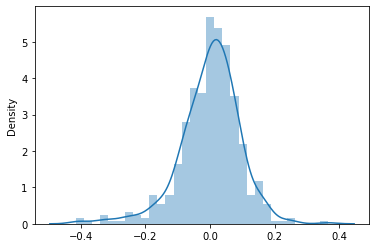

In [80]:
res = y_train - y_train_pred
sns.distplot(res)

## Predictions and Evluations on test set

In [67]:
x_train_new.columns

Index(['temp', 'windspeed', 'year', 'spring', 'summer', 'winter', 'mist',
       'snow', 'sep'],
      dtype='object')

In [70]:
num_vars=['temp','hum','windspeed','cnt']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,mon,sat,...,dec,feb,jan,july,jun,mar,may,nov,oct,sep
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535,0.901354,0.610133,0.153728,0.712034,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
152,0.817246,0.314298,0.537414,0.569029,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [71]:
df_test.describe()

,temp,hum,windspeed,cnt,year,spring,summer,winter,mon,sat,...,dec,feb,jan,july,jun,mar,may,nov,oct,sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592,0.479452,0.255708,0.264840,0.232877,0.155251,0.132420,...,0.086758,0.073059,0.068493,0.114155,0.086758,0.068493,0.095890,0.068493,0.068493,0.095890
std,0.233698,0.148974,0.159947,0.218435,0.500722,0.437258,0.442259,0.423633,0.362974,0.339723,...,0.282125,0.260830,0.253169,0.318728,0.282125,0.253169,0.295115,0.253169,0.253169,0.295115
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y_test = df_test.pop('cnt')
x_test = df_test

In [75]:
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [76]:
x_test_new.columns

Index(['const', 'temp', 'windspeed', 'year', 'spring', 'summer', 'winter',
       'mist', 'snow', 'sep'],
      dtype='object')

In [77]:
#predict
y_test_pred = lr_model.predict(x_test_new)

In [81]:
# evaluate using r2
r2_score(y_test,y_test_pred)

0.7983994619556152

## Equation of a Best-Fit line
###  cnt =  0.4722 x temp - 0.1517 x windspeed + 0.2349 x year - 0.0745 x spring + 0.0463 x summer
###              + 0.0787 x winter - 0.0778 x mist - 0.2710 x snow + 0.0675 x sep

### Demand of Boom Bikes mainly depend on below variable
- Demand depends on 'temp','windspeed','year','spring','summer','winter','mist','snow','sep'
- Demand of the Boom Bikes increases if 'temp','year','summer','winter','sep' increases
- Demand of the Boom Bikes decreases if 'windspeed','spring','mist','snow' increases